In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc

In [3]:
df = pd.read_excel('/Users/sanghyuk/Desktop/Python/mort1 - main model variables.xlsx')
df

,orig_time,uer_time_x,REtype_CO_orig,REtype_PU_orig,REtype_SF_orig,investor_orig,balance_orig,FICO_orig,LTV_orig,Interest_Rate_orig,hpi_orig,term,uer_change_xy,HPI_change_orig_y,IR_change_orig_y,seasoning_orig_x,default_time_y
0,-7,4.7,0,0,1,0,45000.0,715,69.4,9.200,87.03,120,3.6,59.42,0.000,32,1
1,18,4.7,0,0,1,0,107200.0,558,80.0,7.680,186.91,120,0.0,38.19,0.000,7,0
2,-6,4.7,0,0,1,0,48600.0,680,83.6,8.750,89.58,120,-0.2,127.79,2.625,31,0
3,18,4.7,0,0,1,0,52800.0,527,80.0,9.155,186.91,120,-0.3,35.48,0.000,7,0
4,19,4.7,0,0,1,0,212000.0,670,80.0,6.580,191.42,120,1.9,-9.99,0.000,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41731,25,8.0,0,1,0,1,242000.0,691,67.2,7.000,226.29,120,0.0,-65.16,0.000,27,0
41732,25,8.0,0,0,1,1,86600.0,672,80.0,7.500,226.29,120,-0.7,-46.32,0.000,27,0
41733,25,8.0,0,0,1,0,196000.0,708,79.8,7.500,226.29,120,-1.4,-44.86,0.000,27,1
41734,14,8.0,0,0,0,0,232000.0,665,74.8,6.500,155.77,120,-1.4,25.66,0.000,38,0


In [6]:
selected_columns = ['orig_time', 'uer_time_x', 'REtype_CO_orig', 'REtype_PU_orig',
                     'REtype_SF_orig', 'investor_orig', 'balance_orig', 'FICO_orig',
                     'LTV_orig', 'Interest_Rate_orig', 'hpi_orig', 'term', 'uer_change_xy',
                     'HPI_change_orig_y', 'IR_change_orig_y', 'seasoning_orig_x', 'default_time_y']
selected_df = df[selected_columns]
desired_order = ['seasoning_orig_x', 'orig_time', 'term', 'balance_orig', 'FICO_orig',
                 'LTV_orig', 'Interest_Rate_orig', 'hpi_orig', 'IR_change_orig_y',
                 'HPI_change_orig_y', 'uer_time_x', 'uer_change_xy', 'REtype_CO_orig',
                 'REtype_PU_orig', 'REtype_SF_orig', 'investor_orig', 'default_time_y']
df = selected_df[desired_order]
df

,seasoning_orig_x,orig_time,term,balance_orig,FICO_orig,LTV_orig,Interest_Rate_orig,hpi_orig,IR_change_orig_y,HPI_change_orig_y,uer_time_x,uer_change_xy,REtype_CO_orig,REtype_PU_orig,REtype_SF_orig,investor_orig,default_time_y
0,32,-7,120,45000.0,715,69.4,9.200,87.03,0.000,59.42,4.7,3.6,0,0,1,0,1
1,7,18,120,107200.0,558,80.0,7.680,186.91,0.000,38.19,4.7,0.0,0,0,1,0,0
2,31,-6,120,48600.0,680,83.6,8.750,89.58,2.625,127.79,4.7,-0.2,0,0,1,0,0
3,7,18,120,52800.0,527,80.0,9.155,186.91,0.000,35.48,4.7,-0.3,0,0,1,0,0
4,6,19,120,212000.0,670,80.0,6.580,191.42,0.000,-9.99,4.7,1.9,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41731,27,25,120,242000.0,691,67.2,7.000,226.29,0.000,-65.16,8.0,0.0,0,1,0,1,0
41732,27,25,120,86600.0,672,80.0,7.500,226.29,0.000,-46.32,8.0,-0.7,0,0,1,1,0
41733,27,25,120,196000.0,708,79.8,7.500,226.29,0.000,-44.86,8.0,-1.4,0,0,1,0,1
41734,38,14,120,232000.0,665,74.8,6.500,155.77,0.000,25.66,8.0,-1.4,0,0,0,0,0


In [9]:
summary_stats = df.describe()
summary_stats

,seasoning_orig_x,orig_time,term,balance_orig,FICO_orig,LTV_orig,Interest_Rate_orig,hpi_orig,IR_change_orig_y,HPI_change_orig_y,uer_time_x,uer_change_xy,REtype_CO_orig,REtype_PU_orig,REtype_SF_orig,investor_orig,default_time_y
count,41736.000000,41736.000000,41736.000000,4.173600e+04,41736.000000,41736.000000,41736.000000,41736.000000,41736.000000,41736.000000,41736.000000,41736.000000,41736.000000,41736.000000,41736.000000,41736.000000,41736.000000
mean,3.532059,20.018809,117.580602,2.538274e+05,659.725273,79.868471,5.339219,195.416928,2.020599,-5.012437,4.969810,1.084445,0.065627,0.116925,0.624617,0.114673,0.363092
std,5.219181,7.352609,13.612812,2.083662e+05,72.342783,9.802534,3.440858,34.515799,3.607149,46.203200,0.564727,1.936356,0.247632,0.321335,0.484228,0.318631,0.480897
min,0.000000,-40.000000,5.000000,0.000000e+00,400.000000,50.100000,0.000000,75.710000,-11.875000,-79.840000,3.800000,-2.300000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,17.000000,120.000000,1.171462e+05,610.000000,75.000000,1.250000,179.450000,0.000000,-45.280000,4.700000,-0.300000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,21.000000,120.000000,1.967500e+05,661.000000,80.000000,6.390000,208.860000,0.000000,-4.040000,4.700000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,3.000000,25.000000,121.000000,3.360000e+05,713.000000,85.000000,7.740000,222.390000,4.500000,30.150000,5.300000,2.500000,0.000000,0.000000,1.000000,0.000000,1.000000
max,65.000000,60.000000,201.000000,8.000000e+06,834.000000,218.500000,18.000000,226.290000,37.500000,149.610000,9.500000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
transposed_stats = summary_stats.transpose()
transposed_stats

,count,mean,std,min,25%,50%,75%,max
seasoning_orig_x,41736.0,3.532059,5.219181,0.000,2.00,2.00,3.00,65.00
orig_time,41736.0,20.018809,7.352609,-40.000,17.00,21.00,25.00,60.00
term,41736.0,117.580602,13.612812,5.000,120.00,120.00,121.00,201.00
balance_orig,41736.0,253827.354997,208366.228255,0.000,117146.25,196750.00,336000.00,8000000.00
FICO_orig,41736.0,659.725273,72.342783,400.000,610.00,661.00,713.00,834.00
LTV_orig,41736.0,79.868471,9.802534,50.100,75.00,80.00,85.00,218.50
Interest_Rate_orig,41736.0,5.339219,3.440858,0.000,1.25,6.39,7.74,18.00
hpi_orig,41736.0,195.416928,34.515799,75.710,179.45,208.86,222.39,226.29
IR_change_orig_y,41736.0,2.020599,3.607149,-11.875,0.00,0.00,4.50,37.50
HPI_change_orig_y,41736.0,-5.012437,46.203200,-79.840,-45.28,-4.04,30.15,149.61


In [13]:
transposed_stats['data_type'] = df.dtypes
transposed_stats

,count,mean,std,min,25%,50%,75%,max,data_type
seasoning_orig_x,41736.0,3.532059,5.219181,0.000,2.00,2.00,3.00,65.00,int64
orig_time,41736.0,20.018809,7.352609,-40.000,17.00,21.00,25.00,60.00,int64
term,41736.0,117.580602,13.612812,5.000,120.00,120.00,121.00,201.00,int64
balance_orig,41736.0,253827.354997,208366.228255,0.000,117146.25,196750.00,336000.00,8000000.00,float64
FICO_orig,41736.0,659.725273,72.342783,400.000,610.00,661.00,713.00,834.00,int64
LTV_orig,41736.0,79.868471,9.802534,50.100,75.00,80.00,85.00,218.50,float64
Interest_Rate_orig,41736.0,5.339219,3.440858,0.000,1.25,6.39,7.74,18.00,float64
hpi_orig,41736.0,195.416928,34.515799,75.710,179.45,208.86,222.39,226.29,float64
IR_change_orig_y,41736.0,2.020599,3.607149,-11.875,0.00,0.00,4.50,37.50,float64
HPI_change_orig_y,41736.0,-5.012437,46.203200,-79.840,-45.28,-4.04,30.15,149.61,float64


In [15]:
rounded_stats = transposed_stats.round(2)
rounded_stats

,count,mean,std,min,25%,50%,75%,max,data_type
seasoning_orig_x,41736.0,3.53,5.22,0.00,2.00,2.00,3.00,65.00,int64
orig_time,41736.0,20.02,7.35,-40.00,17.00,21.00,25.00,60.00,int64
term,41736.0,117.58,13.61,5.00,120.00,120.00,121.00,201.00,int64
balance_orig,41736.0,253827.35,208366.23,0.00,117146.25,196750.00,336000.00,8000000.00,float64
FICO_orig,41736.0,659.73,72.34,400.00,610.00,661.00,713.00,834.00,int64
LTV_orig,41736.0,79.87,9.80,50.10,75.00,80.00,85.00,218.50,float64
Interest_Rate_orig,41736.0,5.34,3.44,0.00,1.25,6.39,7.74,18.00,float64
hpi_orig,41736.0,195.42,34.52,75.71,179.45,208.86,222.39,226.29,float64
IR_change_orig_y,41736.0,2.02,3.61,-11.88,0.00,0.00,4.50,37.50,float64
HPI_change_orig_y,41736.0,-5.01,46.20,-79.84,-45.28,-4.04,30.15,149.61,float64


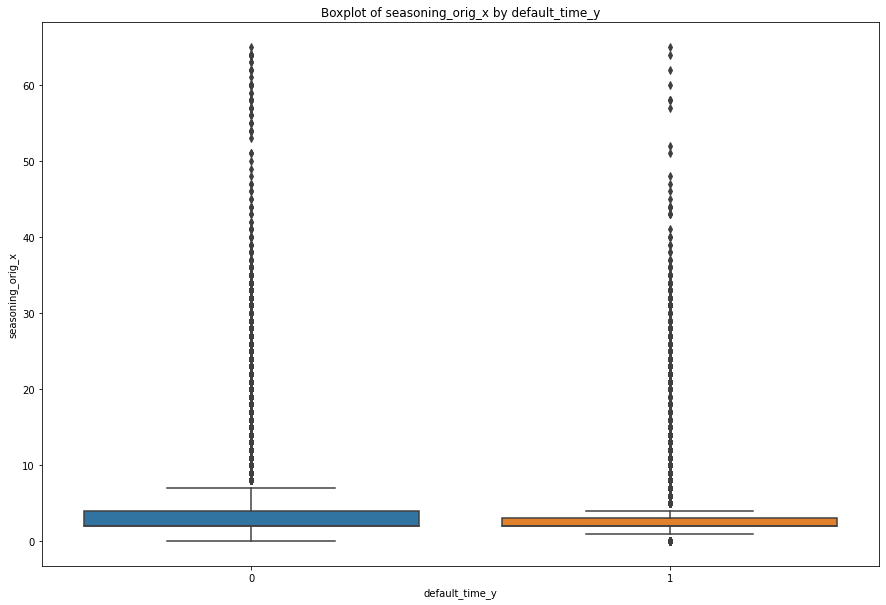

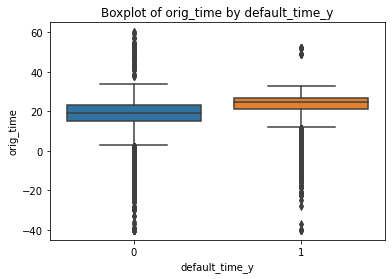

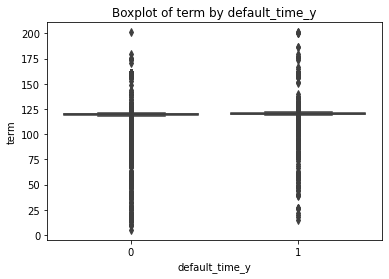

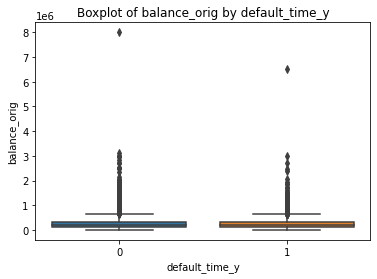

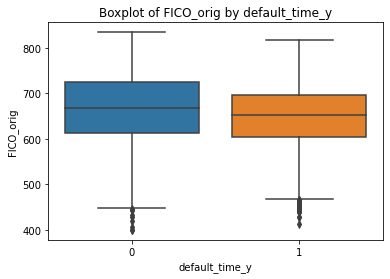

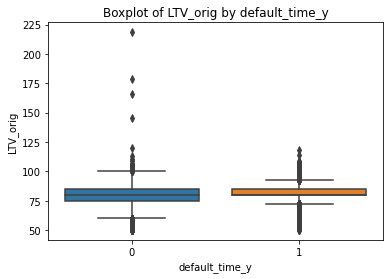

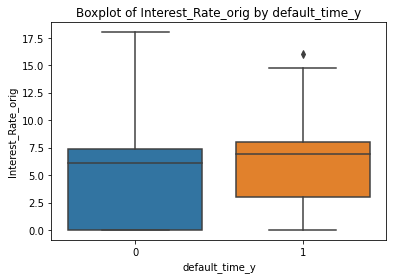

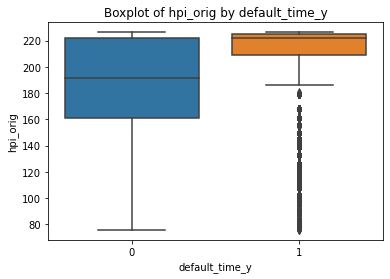

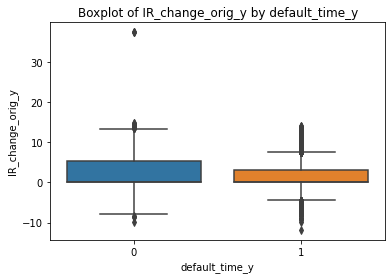

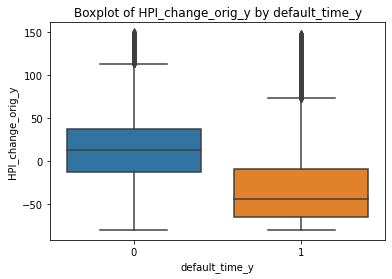

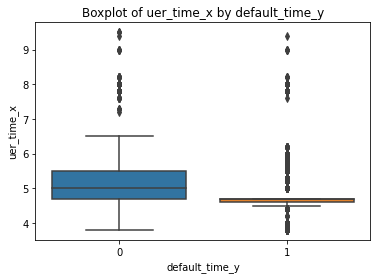

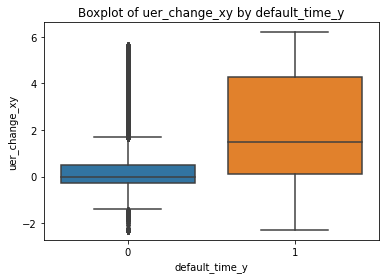

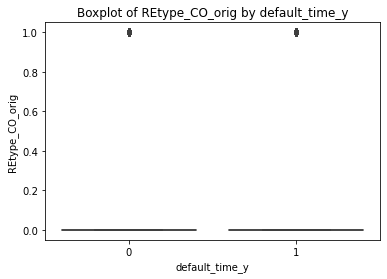

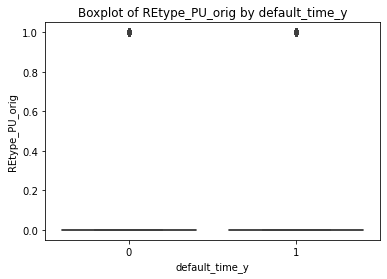

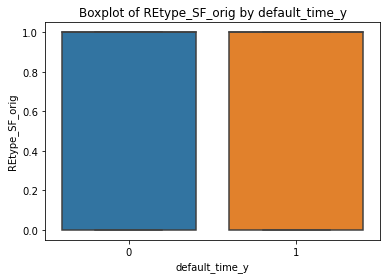

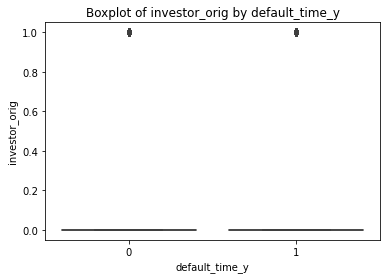

In [17]:
variables_for_boxplot = ['seasoning_orig_x', 'orig_time', 'term', 'balance_orig', 'FICO_orig',
                         'LTV_orig', 'Interest_Rate_orig', 'hpi_orig', 'IR_change_orig_y',
                         'HPI_change_orig_y', 'uer_time_x', 'uer_change_xy', 'REtype_CO_orig',
                         'REtype_PU_orig', 'REtype_SF_orig', 'investor_orig']

plt.figure(figsize=(15, 10))
for variable in variables_for_boxplot:
    sns.boxplot(x='default_time_y', y=variable, data=df)
    plt.title(f'Boxplot of {variable} by default_time_y')
    plt.show()

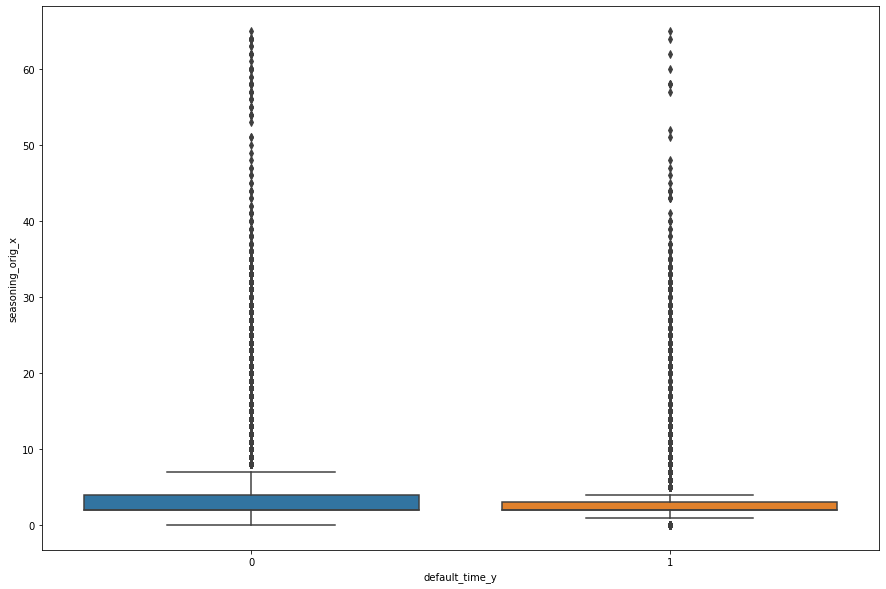

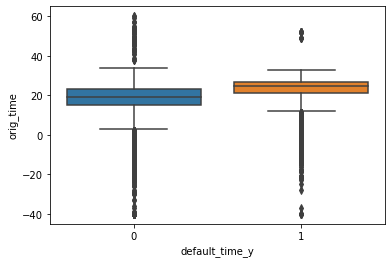

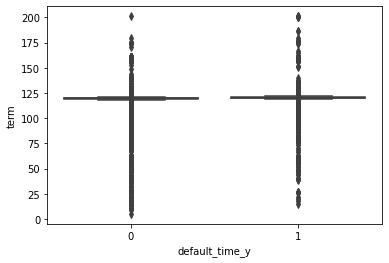

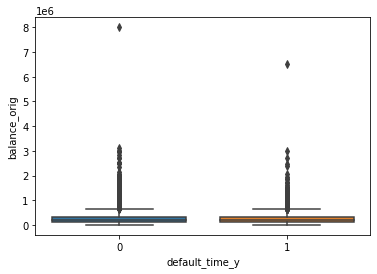

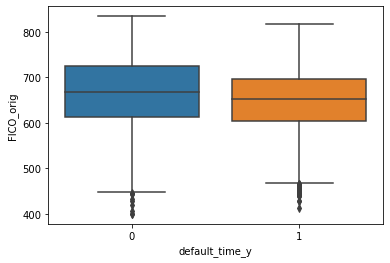

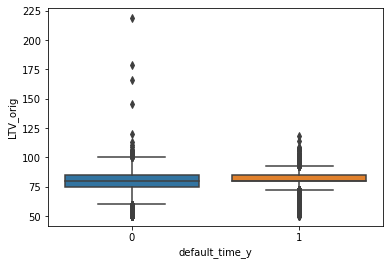

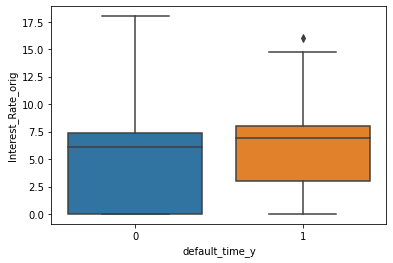

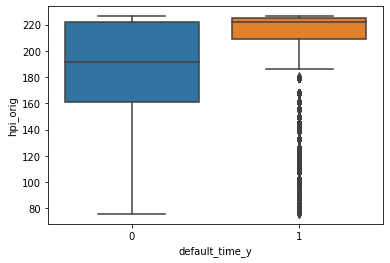

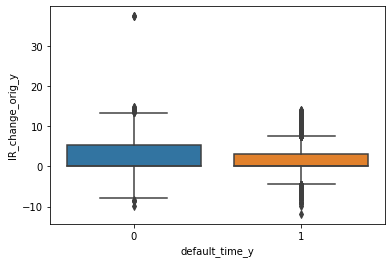

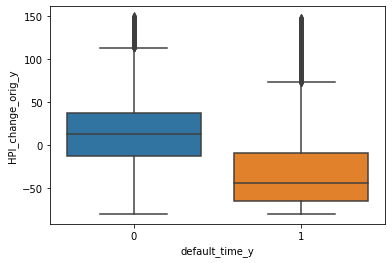

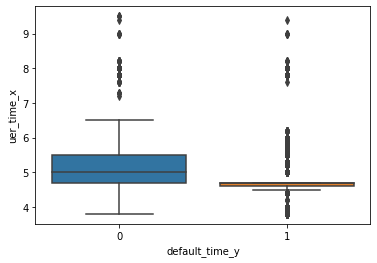

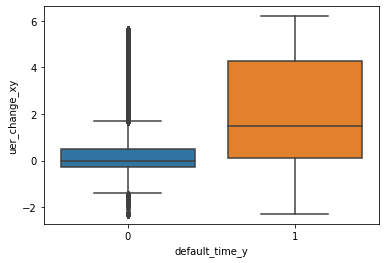

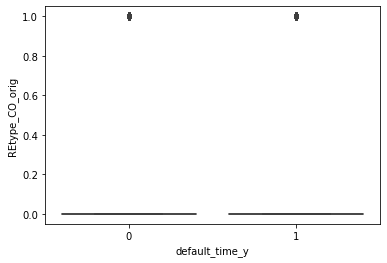

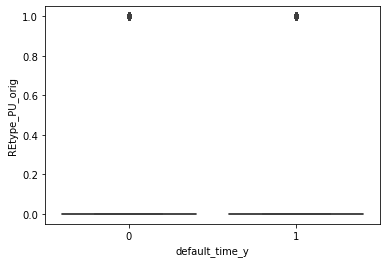

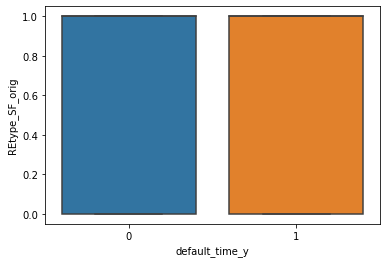

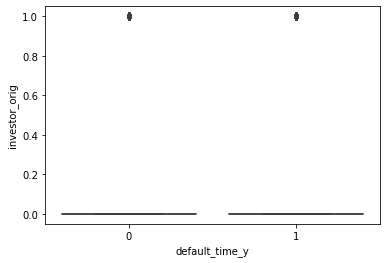

In [18]:
variables_for_boxplot = ['seasoning_orig_x', 'orig_time', 'term', 'balance_orig', 'FICO_orig',
                         'LTV_orig', 'Interest_Rate_orig', 'hpi_orig', 'IR_change_orig_y',
                         'HPI_change_orig_y', 'uer_time_x', 'uer_change_xy', 'REtype_CO_orig',
                         'REtype_PU_orig', 'REtype_SF_orig', 'investor_orig']

plt.figure(figsize=(15, 10))
for variable in variables_for_boxplot:
    sns.boxplot(x='default_time_y', y=variable, data=df)
    plt.show()

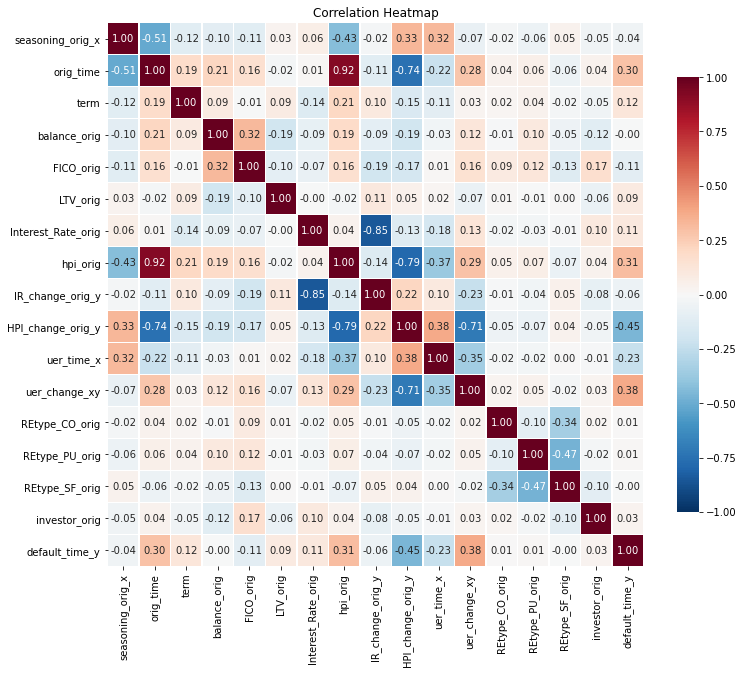

In [30]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', fmt=".2f", linewidths=.5, vmin=-1, vmax=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap')
plt.gca().set_facecolor((242/255, 242/255, 242/255))
plt.show()